This project display the implementation of various models and picking one for predicting prices of houses in California. Dataset used is California Housing Price from Kaggle.

In [ ]:
import pandas as pd

In [ ]:
housing = pd.read_csv("housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


We want rows to be in random position, which will train out model in a better way, so we shuffle the data

In [ ]:
housing_shuffled = housing.sample(n=len(housing), random_state=1)
housing_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


We will categorize ocean_proximity into more practical way using Pandas

In [ ]:
pd.get_dummies(housing_shuffled['ocean_proximity'], dtype=int).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


We no longer need ocean_proximity column as we have dummies, so we drop it from dataframe and add new dummies columns

In [ ]:
housing_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [ ]:
housing_concat = pd.concat([housing_shuffled.drop('ocean_proximity', axis=1),
                            pd.get_dummies(housing_shuffled['ocean_proximity'], dtype=int)],axis=1)

housing_concat.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0


We are moving our y value to the end of a dataframe and drop NaN values. we are loosing 2007 values,
but its not that bad considering we still have 20640 rows of data

In [ ]:

housing_concat = housing_concat[['longitude', 'latitude',
                                 'housing_median_age', 'total_rooms',
                                 'total_bedrooms', 'population',
                                 'households', 'median_income',
                                 '<1H OCEAN', 'INLAND', 'ISLAND',
                                 'NEAR BAY', 'NEAR OCEAN', 'median_house_value']]
housing_concat

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [ ]:
housing_concat = housing_concat.dropna()
len(housing_concat)

20433

Now we are spliting data into train and test datasets by introducing X and y

In [ ]:
train, test, val = housing_concat[:18000], housing_concat[18000:19217], housing_concat[19215:]
len(train), len(test), len(val)

(18000, 1217, 1218)

In [ ]:
X_train, y_train = train.to_numpy()[:,:-1], train.to_numpy()[:,-1]
X_val, y_val = val.to_numpy()[:,:-1], val.to_numpy()[:,-1]
X_test, y_test = test.to_numpy()[:, :-1], test.to_numpy()[:,-1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

We need to preprocess data by scaling all data except our target values using simple StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8] = scaler.transform(A[:, :8])
    return A

X_train, X_val, X_test  = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

We used X_train_preprocessed variable to test our scalling technique and verified it as all scaled values aim to zero

It can be justified by looking at histograms from 1-7

In [ ]:
X_train_preprocessed = preprocessor(X_train)
pd.DataFrame(X_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,59.964965,-17.023460,-2.215748,-1.211817,-1.280134,-1.256640,-1.310613,-2.206508,1.0,0.0,0.0,0.0,0.0
1,59.611398,-16.427508,-2.228399,-1.211949,-1.281354,-1.256613,-1.311898,-2.557774,0.0,1.0,0.0,0.0,0.0
2,58.954063,-16.219363,-2.171467,-1.212027,-1.281604,-1.256308,-1.312118,-1.995683,0.0,0.0,0.0,1.0,0.0
3,58.988922,-16.201835,-2.133511,-1.212340,-1.283386,-1.257349,-1.314321,-2.684181,0.0,0.0,0.0,1.0,0.0
4,60.022233,-17.076044,-2.228399,-1.212088,-1.282291,-1.256950,-1.312968,-1.673505,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,60.027213,-17.060707,-2.247377,-1.211881,-1.280565,-1.256297,-1.311159,-2.218414,1.0,0.0,0.0,0.0,0.0
17996,59.434615,-16.311385,-2.177793,-1.212024,-1.281547,-1.256409,-1.312112,-2.537415,0.0,1.0,0.0,0.0,0.0
17997,59.959985,-17.021269,-2.329613,-1.211639,-1.278510,-1.256327,-1.308776,-2.121620,1.0,0.0,0.0,0.0,0.0
17998,60.226405,-17.021269,-2.209422,-1.211790,-1.279782,-1.255926,-1.310254,-2.520344,0.0,1.0,0.0,0.0,0.0


<Axes: >

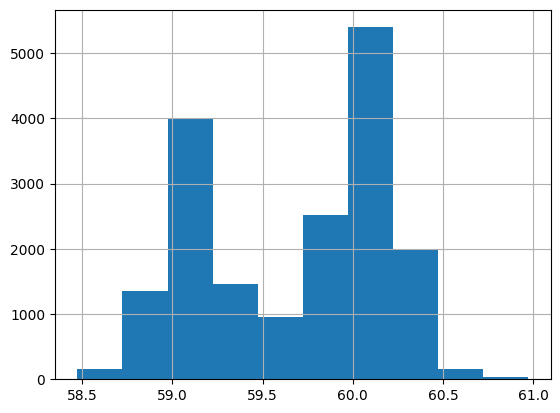

In [ ]:
pd.DataFrame(X_train_preprocessed)[0].hist()

Now we will be finding mean-square-error of our first LinearRegression model

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(X_train, y_train)
mse(lr_model.predict(X_train), y_train, squared=False), mse(lr_model.predict(X_val), y_val, squared=False)

(68593.05578127236, 71382.43558330165)

We will try another model from SkLearn, which is KNeighborsRegressor and observe that we have overfitting problem. However, increasing number of neighbors will resolve overfitting issue

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn_model.predict(X_train), y_train, squared=False), mse(knn_model.predict(X_val), y_val, squared=False)

(53759.09908812057, 62161.22860469906)

We will try RandomForestRegressor, which will display high error values, but without overfitting problem. Its important to notice that error value decreases, but overfitting will occur, as we increasing the complexity of the model by increasing max_depth parameter value.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr_model.predict(X_train), y_train, squared=False), mse(rfr_model.predict(X_val), y_val, squared=False)

(43612.50439431327, 53539.75201176839)

In GradientBoostingRegressor model we get better results, but still have overfitting problem. After experiments, n_estimators parameter is set to 250 as it show lowest error and smaller overfitting.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr_model.predict(X_train), y_train, squared=False), mse(gbr_model.predict(X_val), y_val, squared=False)

(47274.82259072157, 51383.19523914342)

As the result we see that GradienBoostingRegresser shows the best resuls out of all above models, but we need to compare it with our neural network model

We will create simple neural network using PyTorch to train our model

In [ ]:
import torch
from torch.utils.data import TensorDataset

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float),
                              torch.tensor(y_train, dtype=torch.float))
train_dataset

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=128)

for X, y in train_dataloader:
  print(X.shape, y.shape)
  break

torch.Size([128, 13]) torch.Size([128])


In [ ]:
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float),
                              torch.tensor(y_test, dtype=torch.float))
test_dataset

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size=64)

for X, y in test_dataloader:
  print(X.shape, y.shape)
  break

torch.Size([64, 13]) torch.Size([64])


In [ ]:
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.hidden_layer_1 = nn.Linear(13, 64)
    self.hidden_activation = nn.ReLU()

    self.out = nn.Linear(64, 1)

  def forward(self, x):
    x = self.hidden_layer_1(x)
    x = self.hidden_activation(x)
    x = self.out(x)
    return x

nn_model = NeuralNet().to(device)
print(nn_model)

Using cpu device
NeuralNet(
  (hidden_layer_1): Linear(in_features=13, out_features=64, bias=True)
  (hidden_activation): ReLU()
  (out): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.01)

In [ ]:
def train(dataloader, nn_model, loss_fn, optimizer):
  nn_model.train()
  train_loss = 0

  for i, (X,y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    y_hat = nn_model(X)
    mse = loss_fn(y_hat, y)
    train_loss += mse.item()

    optimizer.zero_grad()
    mse.backward()
    optimizer.step()

  num_batches = len(dataloader)
  train_mse = train_loss / num_batches
  print(f'Train RMSE: {train_mse**(1/2)}')

In [ ]:
def test(dataloader, nn_model, loss_fn):
  nn_model.eval()
  test_loss = 0

  with torch.no_grad():
    for X, y in dataloader:
      y_hat = nn_model(X)
      test_loss += loss_fn(y_hat,y).item()

  num_batches = len(dataloader)
  test_mse = test_loss / num_batches
  print(f'Test RMSE: {test_mse**(1/2)}')

In [ ]:
epochs = 10

for epoch in range(epochs):
  print(f"Epoch {epoch+1}:")

  train(train_dataloader, nn_model, loss_fn, optimizer)
  test(test_dataloader, nn_model, loss_fn)

Epoch 1:
Train RMSE: 241225.8748841011
Test RMSE: 241192.11343657156
Epoch 2:
Train RMSE: 241150.68237431964
Test RMSE: 241103.14452034837
Epoch 3:
Train RMSE: 241047.96014735324
Test RMSE: 240986.37497086843
Epoch 4:
Train RMSE: 240917.37758493057
Test RMSE: 240841.9067853433
Epoch 5:
Train RMSE: 240759.2623613887
Test RMSE: 240670.06961066014
Epoch 6:
Train RMSE: 240573.93476102102
Test RMSE: 240471.09008111557
Epoch 7:
Train RMSE: 240361.19508439794
Test RMSE: 240244.2673746868
Epoch 8:
Train RMSE: 240120.58879821197
Test RMSE: 239989.7619149617
Epoch 9:
Train RMSE: 239852.62034841313
Test RMSE: 239708.2775308354
Epoch 10:
Train RMSE: 239558.00751216811
Test RMSE: 239400.49154836754
